In [2]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

In [3]:

import matplotlib as mpl
import matplotlib

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "sans serif"
plt.rcParams['font.serif'] = "cm"

matplotlib.rcParams['xtick.major.pad']='10'
matplotlib.rcParams['ytick.major.pad']='7'
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25) 
matplotlib.rcParams.update({'font.size': 25})
matplotlib.rcParams.update({'legend.fontsize': 15})#,
          #'legend.handlelength': 2)
    

In [4]:
from sympy import *
init_printing(use_unicode=True)

In [5]:
x = symbols('x',real=True)
L = symbols('L',positive=True,real=True)
U0 = symbols('U0',real=True,positive=True)
dU = symbols('\Delta\ U',real=True,positive=True)

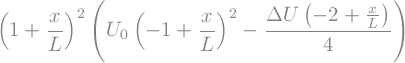

In [6]:
# Define potential
U = ( U0*((x/L) - 1)**2 - Rational(1,4)*dU*((x/L) -2) ) * (x/L + 1)**2
#force = -diff(U,x)
#div_force = -diff(U,x,2)

U

In [9]:
expr = U.subs(x,L) - U.subs(x,-L)
expr

In [10]:
DU = diff(U,x)
x0,x1,x2 = solve(DU,x)

x0 = simplify(x0)
x1 = simplify(x1)
x2 = simplify(x2)

## Extremum 0

In [11]:
x0_ = simplify(x0.subs(dU,0))
x0_

In [12]:
print( re(x0_.subs(L,1)))
print( im(x0_.subs(L,1)))

-1
0


In [13]:
x0

## Extremum 1

In [14]:
x1_ = simplify(x1.subs(dU,0))
x1_

In [15]:
print( simplify( re(x1_.subs(L,1))) )
print( simplify( im(x1_.subs(L,1))) )

1
0


In [16]:
x1

## Extremum 2

In [17]:
x2_ = simplify(x2.subs(dU,0))
x2_

In [18]:
print( simplify( re(x2_.subs(L,1))) )
print( simplify( im(x2_.subs(L,1))) )

0
0


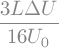

In [19]:
x2

## Barrier heights

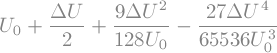

In [21]:
simplify( U.subs(x,x2) - U.subs(x,x0) )

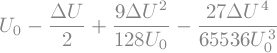

In [22]:
simplify( U.subs(x,x2) - U.subs(x,x1) )

## Numerical example

Barrier height from left = 3.1264647841453552
Barrier height from right = 2.8764647841453552


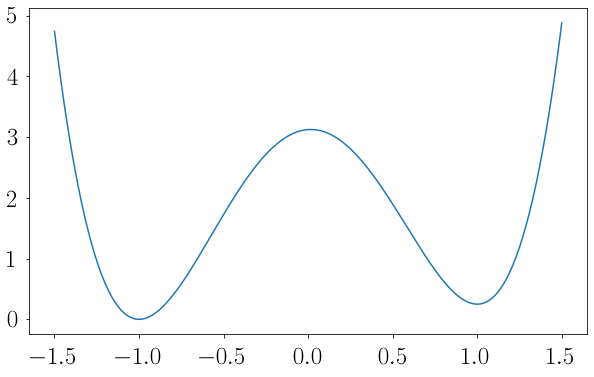

In [35]:
L_ = 1.
U0_ = 3.
dU_ = 0.25

U_func = lambdify(x,U.subs(U0,U0_).subs(dU,dU_).subs(L,L_))
x2_func = lambdify(dU,re(x2.subs(U0,U0_).subs(L,L_)))

print('Barrier height from left =',U_func(x2_func(dU_)) - U_func(-L_))
print('Barrier height from right =',U_func(x2_func(dU_)) - U_func(L_))

xP = np.linspace(-1.5,1.5,num=300)
yP = U_func(xP)

fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(xP,yP)
plt.show()
plt.close(fig)

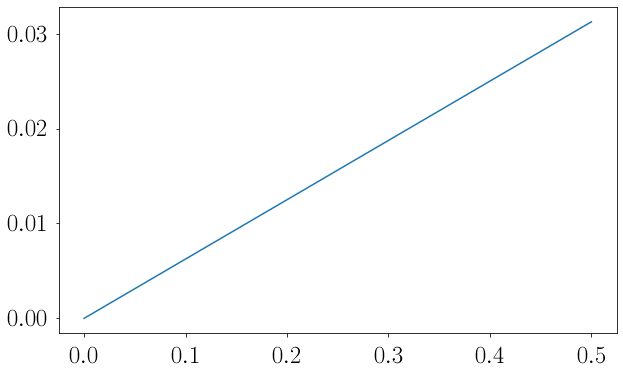

In [28]:
x2_func = lambdify(dU,re(x2.subs(U0,U0_).subs(L,L_)))

xP = np.linspace(0,.5,num=100)
yP = x2_func(xP)

fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(xP,yP)
plt.show()
plt.close(fig)